In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import cuda, jit, float32
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import string
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.utils import to_categorical
df = pd.read_csv('C:/Users/11/Desktop/handwritten_data.csv',encoding='utf8')

In [47]:
features = df.values[:,1:]
labels = df.values[:,0]

features = features.reshape(len(features), 28, 28)

nr_to_letter = {k:v.upper() for k,v in enumerate(list(string.ascii_lowercase))}
nr_to_letter

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

필기체 확인

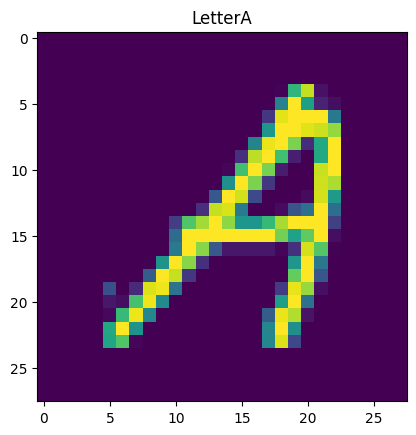

In [48]:
plt.title('Letter' + nr_to_letter[labels[10]])
plt.imshow(features[10])

In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('C:/Users/11/Desktop/handwritten_data.csv', encoding='utf8')

# Extract features and labels
features = df.iloc[:, 1:].values.reshape(-1, 28, 28, 1)  # Assuming pixel values are in columns 1 to the end
labels = df.iloc[:, 0].values

# Check the number of unique labels/classes
num_classes = len(np.unique(labels))
print("Number of classes:", num_classes)

# Normalize pixel values
features = features.astype(np.float32) / 255.0

# One-hot encode labels
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels_one_hot, test_size=0.2, random_state=42)

# Build the model
cnn = Sequential()
cnn.add(Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(120, (5, 5), padding='same', activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=12, validation_data=(x_test, y_test), verbose=2)

# Evaluate the model on the test set
res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1] * 100)


Number of classes: 26
Epoch 1/12
2326/2326 - 88s - loss: 0.1905 - accuracy: 0.9474 - val_loss: 0.0876 - val_accuracy: 0.9768 - 88s/epoch - 38ms/step
Epoch 2/12
2326/2326 - 87s - loss: 0.0703 - accuracy: 0.9809 - val_loss: 0.0691 - val_accuracy: 0.9817 - 87s/epoch - 38ms/step
Epoch 3/12
2326/2326 - 87s - loss: 0.0525 - accuracy: 0.9853 - val_loss: 0.0610 - val_accuracy: 0.9833 - 87s/epoch - 37ms/step
Epoch 4/12
2326/2326 - 93s - loss: 0.0402 - accuracy: 0.9885 - val_loss: 0.0552 - val_accuracy: 0.9843 - 93s/epoch - 40ms/step
Epoch 5/12
2326/2326 - 92s - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.0483 - val_accuracy: 0.9874 - 92s/epoch - 40ms/step
Epoch 6/12
2326/2326 - 92s - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.0409 - val_accuracy: 0.9893 - 92s/epoch - 40ms/step
Epoch 7/12
2326/2326 - 91s - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0403 - val_accuracy: 0.9902 - 91s/epoch - 39ms/step
Epoch 8/12
2326/2326 - 86s - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.0382 - val_acc

In [56]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('C:/Users/11/Desktop/handwritten_data.csv', encoding='utf8',nrows=50000)

# Extract features and labels
features = df.iloc[:, 1:].values.reshape(-1, 28, 28, 1)  # Assuming pixel values are in columns 1 to the end
labels = df.iloc[:, 0].values

# Check the number of unique labels/classes
num_classes = len(np.unique(labels))
print("Number of classes:", num_classes)

# Normalize pixel values
features = features.astype(np.float32) / 255.0

# One-hot encode labels
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels_one_hot, test_size=0.2, random_state=42)

# Build the model
cnn = Sequential()
cnn.add(Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(60, (5, 5), padding='same', activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=12, validation_data=(x_test, y_test), verbose=2)

# Evaluate the model on the test set
res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1] * 100)


Number of classes: 4
Epoch 1/12
313/313 - 10s - loss: 0.1058 - accuracy: 0.9645 - val_loss: 0.0409 - val_accuracy: 0.9886 - 10s/epoch - 33ms/step
Epoch 2/12
313/313 - 10s - loss: 0.0231 - accuracy: 0.9932 - val_loss: 0.0286 - val_accuracy: 0.9919 - 10s/epoch - 33ms/step
Epoch 3/12
313/313 - 11s - loss: 0.0140 - accuracy: 0.9962 - val_loss: 0.0121 - val_accuracy: 0.9964 - 11s/epoch - 35ms/step
Epoch 4/12
313/313 - 10s - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.0090 - val_accuracy: 0.9980 - 10s/epoch - 31ms/step
Epoch 5/12
313/313 - 10s - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0177 - val_accuracy: 0.9946 - 10s/epoch - 30ms/step
Epoch 6/12
313/313 - 10s - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0078 - val_accuracy: 0.9983 - 10s/epoch - 31ms/step
Epoch 7/12
313/313 - 10s - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0109 - val_accuracy: 0.9966 - 10s/epoch - 31ms/step
Epoch 8/12
313/313 - 10s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0059 - val_accuracy: 0.9989 - 1

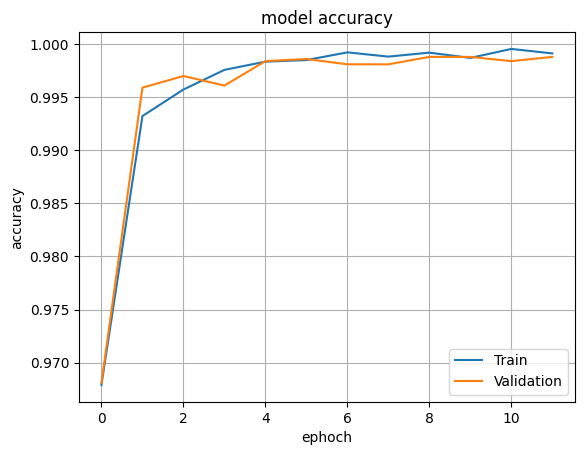

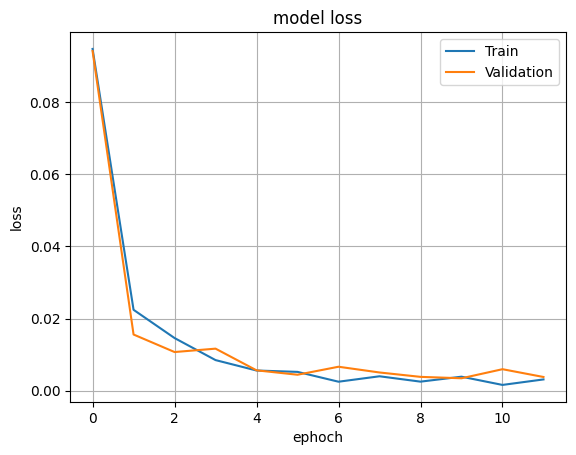

In [54]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('ephoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('ephoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()